
## 互评作业二：基于文本的推荐系统
### 数据集：[Amazon - Ratings (Beauty Products)](https://www.kaggle.com/datasets/skillsmuggler/amazon-ratings)                                 

### 数据预处理：数据集经过清洗、去重、归一化等预处理步骤。                                                                                                    

### 文本挖掘：使用聚类分析和文本挖掘技术，挖掘用户和物品之间的关联关系。根据用户的历史购买记录、搜索记录等信息，创建各种关联规则，例如：                     
#### 用户历史购买记录中包含某个物品，则用户推荐购买该物品；
#### 用户历史购买记录中未包含某个物品，则用户不推荐购买该物品； 
#### 用户搜索记录中包含某个物品，则用户推荐购买该物品； 
#### 用户搜索记录中未包含某个物品，则用户不推荐购买该物品。                          
#### 推荐结果：根据创建的关联规则，预测用户推荐购买的物品。计算每个用户和物品之间的推荐关系，并输出结果。     

推荐系统根据业务背景分为三个部分设计：
* **推荐系统第一部分：**针对新客户的基于产品知名度的推荐系统
* **推荐系统第二部分：**基于客户购买历史和购买类似商品的其他用户提供的评分的基于模型的协同过滤系统
* **推荐系统第三部分：**没有任何产品评级的情况下建立其电子商务网站

当一位没有任何购买历史的新客户首次访问电子商务网站，新客户会被推荐在该公司网站上销售的最受欢迎的产品。一旦进行了购买，推荐系统就会根据其他用户在网站上提供的购买历史和评级来更新和推荐其他产品。后一部分是使用协作过滤技术完成的。

## 推荐系统-第一部分
### 针对新客户的基于产品知名度的推荐系统

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [24]:
amazon_ratings = pd.read_csv('../input/amazon-ratings/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [25]:
amazon_ratings.shape

(2023070, 4)

In [26]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


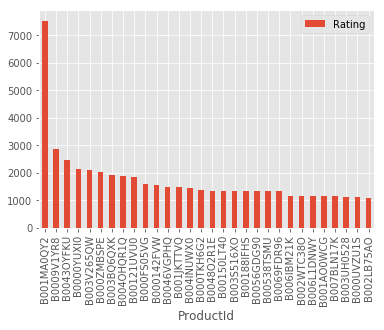

In [27]:
most_popular.head(30).plot(kind = "bar")

 分析:
   
* 上图给出了该公司销售的最受欢迎的产品（按降序排列）。
* 例如，产品ID B001MA0QY2的销售额超过7000，其次是最受欢迎的产品ID B0009V1YR8的销售额达到3000

## 推荐系统-第二部分
### 基于模型的协同过滤推荐系统

* 根据购买历史以及购买商品的其他用户提供的评分与特定客户的评分的相似性，向用户推荐商品。

In [28]:
# 亚马逊评级子集

amazon_ratings1 = amazon_ratings.head(10000)

In [29]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
ratings_utility_matrix.shape

(9697, 886)

转换矩阵

In [31]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X.shape

(886, 9697)

In [33]:
X1 = X

### 分解矩阵

In [34]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

### 相关矩阵

In [35]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

### 从相关矩阵中分离产品ID#6117036094

假设客户购买了产品ID#6117036094（随机选择）

In [36]:
X.index[99]

'6117036094'

In [37]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

根据购买同一产品的其他客户对商品的评分，将所有商品与该客户购买的商品进行关联

In [38]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

### 按顺序推荐前10个高度相关的产品

In [39]:
Recommend = list(X.index[correlation_product_ID > 0.90])

Recommend.remove(i) 

Recommend[0:9]

['0733001998',
 '1906987238',
 '3292000971',
 '535795545X',
 '5357955832',
 '5357955972',
 '5357956111',
 '6152000416',
 '6162071103']

## 推荐系统 - 第三部分
* 对于没有任何用户购买历史的企业，可以为设计基于搜索引擎的推荐系统。产品推荐可以基于产品描述中给出的文本聚类分析。


In [43]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [44]:
product_descriptions = pd.read_csv('../input/home-depot-product-search-relevance/product_descriptions.csv.zip')
product_descriptions.shape

(124428, 2)

#### 检查缺失值

In [45]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [46]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

#### 从产品描述中提取特征


In [47]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

#### 产品聚类可视化

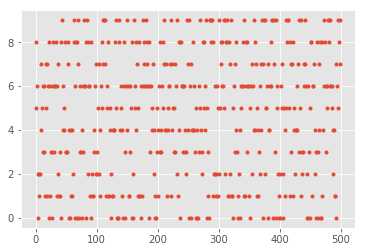

In [48]:


X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


F

In [49]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

## 输出
* 根据用户选择的当前产品推荐产品。
* 根据推荐相关产品，经常一起购买。

#### 基于产品描述的每个集群中的热门词

In [50]:

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 water
 insulation
 use
 concrete
 ft
 used
 based
 seal
 provides
 paint
Cluster 1:
 power
 air
 light
 control
 cooling
 led
 volt
 free
 plan
 protection
Cluster 2:
 natural
 wall
 ft
 use
 recommended
 indoor
 width
 piece
 home
 plate
Cluster 3:
 cutting
 saw
 metal
 blade
 steel
 head
 tool
 easy
 drill
 cut
Cluster 4:
 watering
 nozzle
 adjustable
 features
 easy
 spray
 duty
 plants
 head
 handle
Cluster 5:
 wood
 post
 painted
 proposition
 nbsp
 residents
 vary
 california
 65
 door
Cluster 6:
 water
 toilet
 flush
 bowl
 tank
 heater
 gal
 design
 wash
 azek
Cluster 7:
 storage
 shelves
 kit
 year
 panel
 adjustable
 easy
 wall
 installation
 space
Cluster 8:
 frame
 patio
 aluminum
 fabric
 steel
 ladder
 resistant
 outdoor
 screen
 window
Cluster 9:
 nickel
 shelf
 kitchen
 finish
 storage
 brushed
 drawer
 lbs
 vanity
 satin


#### 基于关键词的聚类预测

In [51]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [55]:
# 关键词：cutting tool
show_recommendations("cutting tool")

Cluster 3:
 cutting
 saw
 metal
 blade
 steel
 head
 tool
 easy
 drill
 cut


In [56]:
# 关键词：spray paint
show_recommendations("spray paint")

Cluster 0:
 water
 insulation
 use
 concrete
 ft
 used
 based
 seal
 provides
 paint


In [57]:
# 关键词：steel drill
show_recommendations("steel drill")

Cluster 3:
 cutting
 saw
 metal
 blade
 steel
 head
 tool
 easy
 drill
 cut


### 如果一个单词出现在多个聚类中，算法会选择该单词出现频率最高的聚类。

In [58]:
show_recommendations("water")

Cluster 6:
 water
 toilet
 flush
 bowl
 tank
 heater
 gal
 design
 wash
 azek


#### 一旦基于用户的搜索词识别出集群，推荐系统就可以基于产品描述显示来自相应产品集群的项目。

### 总结：

#### 如果企业是第一次建立电子商务网站，并且没有用户物品购买/评级历史记录，那么那么本推荐系统将会很好的解决“冷启动”问题。该推荐系统将帮助用户从一开始就获得良好的推荐，一旦买家有了购买历史，推荐引擎就可以使用基于模型的协同过滤方法。